### Dataset creation and processing

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd 
import numpy as np
import warnings
import time
import seaborn as sns
import matplotlib.pyplot as plt
import random
import datetime

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re 

warnings.filterwarnings('ignore')

df = pd.read_csv('data.csv')
df.head(1)

,Unnamed: 0,Name,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,...,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1.1,catagory,description,sub_catagory
0,0,Summer Squash Salad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy


### Basic cleaning

Removing duplicate columns

In [2]:
l = ['Name','sub_catagory','catagory','description']
drop = []
columns = list(df.columns)
for col in columns:
    if col not in l:
        drop.append(col)
if drop!=[]:
    df = df.drop(drop,axis=1)


### Adding a column 'veg/nonveg'

In [3]:
l = ['chicken','wings','meat','salmon','salmons','cob','cobs','kebab','kebabs','fish','snake','gosht','bacon','mutton','lamb','egg','eggs']
nv = ['chicken','meat']
vg_nv = []

for name,cat in zip(df.Name,df.catagory):
    n = name.split()
    f=0
    if cat in nv:
        vg_nv.append('non-veg')
    else: 
        for i in n:
            if i.lower() in l:
                f=1
        if f==1:
            vg_nv.append('non-veg')
        else:
            vg_nv.append('veg')
            
df['Veg_Non'] = vg_nv
df.head()

,Name,catagory,description,sub_catagory,Veg_Non
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg


veg        1646
non-veg     305
Name: Veg_Non, dtype: int64


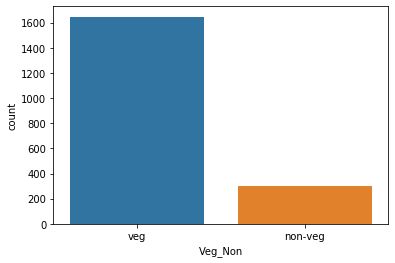

In [4]:
print(df.Veg_Non.value_counts())
sns.countplot(df.Veg_Non)

### Adding a column 'review'

In [5]:
review = []
for i in range(df.shape[0]):
    review.append(random.randint(1,10))
df['Review'] = review
df.head()

,Name,catagory,description,sub_catagory,Veg_Non,Review
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,10
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,1
3,Tricolour Salad,NaN,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,6
4,Sakkarai Pongal,NaN,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,3


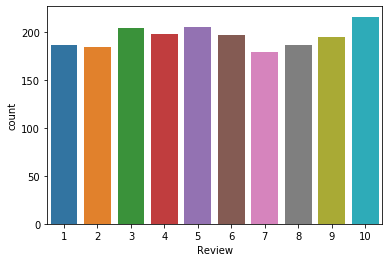

In [6]:
sns.countplot(df.Review)

### Adding a column 'Nutrient'

In [7]:
class Nutrient:
    
    def __init__(self,df):
        self.df = df
        pass
    
    def Iron(self):
        url = 'https://www.redcrossblood.org/donate-blood/blood-donation-process/before-during-after/iron-blood-donation/iron-rich-foods.html'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'par-33'})
        l=[]
        iron = []
        for html in s:
            l = html.ul.text.split('\n')
            l = l[1:-1]
            iron = iron+l
        iron = ['red meat', 'poultry', 'eggs','egg', 'fruits', 'green' , 'fortified bread'] + iron
        return iron
    
    def Calcium(self):
        url = 'https://www.medicalnewstoday.com/articles/322585.php#non-dairy-sources-of-calcium'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        calcium = []
        for i in s[:-1]:
            calcium.append(i.text.split('.')[1].strip())
        calcium =['keer','yogurt', 'cheese', 'milk', 'salmon', 'leafy green','Cappuccino'] + calcium
        return calcium
    
    def Sodium(self):
        url = 'https://www.healthline.com/nutrition/foods-high-in-sodium#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        sodium = []
        for i in s[:-1]:
            sodium.append(i.a.text.split('.')[1].strip())
        sodium = ['salt', 'soy sauce', 'vegetables'] + sodium
        return sodium
    
    def Iodine(self):
        url = 'https://www.healthline.com/nutrition/iodine-rich-foods#section1'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        iodine = []
        for i in s[:-1]:
            iodine.append(i.a.text.split('.')[1].strip())
        iodine = [ 'salt', 'seafood'] + iodine
        return iodine
    
    def Magnesium(self):
        url = 'https://www.healthline.com/nutrition/10-foods-high-in-magnesium#section11'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        magnesium = []
        for i in s[:-1]:
            magnesium.append(i.a.text.split('.')[1].strip())
        magnesium =['chocolate','Spinach', 'broccoli', 'legumes', 'seeds'] + magnesium
        return magnesium
    
    def Selenium(self):
        url = 'https://www.healthline.com/health/selenium-foods#cashews'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        selenium = []
        for i in s[2:]:
            selenium.append(i.a.text.split('.')[1].strip())
        selenium = ['banana','Organ meat', 'seafood', 'walnuts'] + selenium
        return selenium
    
    def Protien(self):
        url = 'https://www.healthline.com/nutrition/20-delicious-high-protein-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        protien = []
        for i in s[:-1]:
            protien.append(i.a.text.split('.')[1].strip())
        protien = protien + ['cookie','cookies','mutton','meat','gosht','Chicken','Wings','Meat','Salmon','Cob','Kebab','Fish','Snake','Gosht','Bacon','Mutton','Lamb']
        url = 'https://www.medicalnewstoday.com/articles/321522.php#high-protein-foods-for-weight-loss'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('p')
        for p in s:
            if p.strong:
                protien.append(p.strong.text.split('.')[1].strip())
        return protien
    
    def Carbohydrates(self): 
        url = 'https://www.healthline.com/nutrition/12-healthy-high-carb-foods'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('div',{'class':'css-0'})
        carb = []
        for i in s[:-1]:
            carb.append(i.a.text.split('.')[1].strip())
        url = 'https://www.medicalnewstoday.com/articles/323110.php#dried-fruits'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('h3')
        for i in s[:-1]:
            carb.append(i.text.split('.')[1].strip())
        url = 'https://www.tuasaude.com/en/high-carb-foods/'
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        s = soup.findAll('td')
        for i in range(3,len(s),3):
            carb.append(s[i].text.strip())
        carb = carb +['Poha','aloo','buttter','ghee','rice','biryani','pulao']
        return carb
    
    def Vitamin_c(self):
        Vitamin_C = ['margarita','Citrus fruit',' potatoes', 'broccoli', 'bell peppers', 'spinach','strawberries','tomatoes', 'Brussels sprouts']
        return Vitamin_C
    
    def Vitamin_A(self):
        return ['beef', 'liver', 'eggs','egg', 'shrimp', 'fish', 'fortified milk',' sweet potatoes', 'carrots', 'pumpkins', 'spinach',' mangoes']

    def Vitamin_D(self):
        return ['milk' ,'cereals',' fatty','fish']

    def Vitamin_E(self):
        return ['vegetables oils', 'leafy green', 'whole grains', 'nuts']

    def Vitamin_K(self):
        return ['Cabbage', 'eggs','egg',' milk', 'spinach', 'broccoli',' kale']
    
    def Chloride(self):
        return ['salt']

    def Potassium(self):
        return ['cake','meat', 'milk', 'fruits', 'vegetables', 'grains', 'legumes']
  
    def Chromium(self):
        return ['meat', 'poultry', 'fish', 'nuts', 'cheese']

    def Copper(self):
        return ['shellfish', 'nuts', 'seeds', 'beans',' prunes']

    def Fluoride(self):
        return ['fish', 'teas']
    
    def Manganese(self):
        return ['nuts', 'legumes', 'whole grains', 'tea','coffee','chai']

    def Zinc(self):
        return ['meat', 'shellfish', 'legumes', 'whole grains']

    def Fiber(self):
        return ['Salad','salad']

    def Phosphorus(self):
        return ['paneer','kebab']
    
    def apply(self):
        Nutritions = {'Phosphorus':self.Phosphorus(),'Fiber':self.Fiber(),
                  'Vitamin_c':self.Vitamin_c(),'Vitamin_A':self.Vitamin_A(),'Vitamin_D':self.Vitamin_D(),'Vitamin_E':self.Vitamin_E(),'Vitamin_K':self.Vitamin_K(),
                 'Calcium':self.Calcium(),'Chloride':self.Chloride(),'Magnesium':self.Magnesium(),'Potassium':self.Potassium(),'Sodium':self.Sodium(),
                  'Chromium':self.Chromium(),'Copper':self.Copper(),'Fluoride':self.Fluoride(),
                  'Iodine':self.Iodine(),'Iron':self.Iron(),'Manganese':self.Manganese(),'Selenium':self.Selenium(),'Zinc':self.Zinc(),'Protien':self.Protien(),'Carbohydrates':self.Carbohydrates()}

        
        nutrient = []
        tokens = []
        for i,j in zip(df.Name,df.description):
            N = [k.lower() for k in i.split()] 
            try:
                D = [k.lower() for k in j.split()]
            except:
                D = []
                
            D = N+D[2:]
            tokens.append(D)
                  

        for value in tokens:
            f=1
            for key,values in Nutritions.items():
                for i in [k.lower() for k in values]:
                    if i in value and f==1:
                        nutrient.append(key)
    
                        f=0
                    
            if f==1:
                nutrient.append(np.nan)
                f=0


                        

        self.df['Nutrient'] = nutrient

ob = Nutrient(df)
ob.apply()

print('missing values:',df.Nutrient.isnull().sum())


missing values: 777


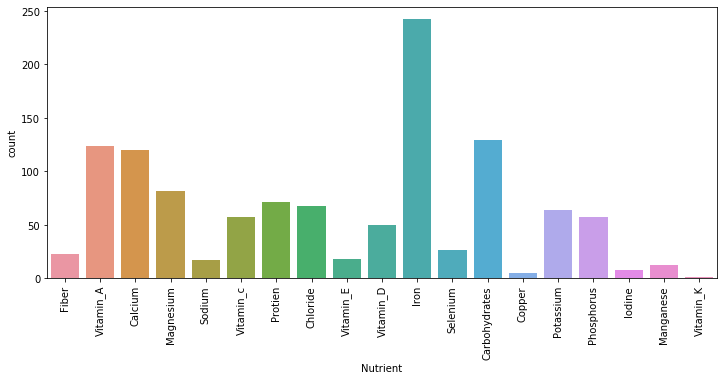

In [8]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.countplot(df.Nutrient)

### Ading a column Disease

In [9]:
class Disease:
    
    def __init__(self,df):
        self.df = df
        name = []
        for i in df.Name:
            l = [str(j).lower() for j in str(i).split()]
            name += l
        self.name = name
        self.nutrient = [str(i).lower() for i in df.Nutrient.unique()]
        
    def removestop(self,tokens):
        stop = set(stopwords.words('english'))
        file = open('stopwords.txt','r')
        l = list(file.read().split())
        stop = list(stop) +l
        l = [token for token in tokens if token not in stop]
        return l
    
    def extract(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    def assemble(self):
        heart_disease = self.extract('https://www.healthline.com/nutrition/heart-healthy-foods#section14')
        hypertension = self.extract('https://www.healthline.com/health/foods-good-for-high-blood-pressure#takeaway')
        obesity = self.extract('https://www.healthline.com/nutrition/20-most-weight-loss-friendly-foods')
        diabeties = self.extract('https://www.healthline.com/nutrition/16-best-foods-for-diabetics#section1')
        kidney_disease = self.extract('https://www.healthline.com/nutrition/best-foods-for-kidneys#4')
        pregnancy = self.extract('https://www.healthline.com/nutrition/13-foods-to-eat-when-pregnant')
        cancer = self.extract('https://www.healthline.com/nutrition/cancer-and-diet#cancer-foods')
        rickets = self.extract('https://www.healthline.com/nutrition/9-foods-high-in-vitamin-d#1')
        scurvy = self.extract('https://www.healthline.com/nutrition/vitamin-c-foods')
        anemia = self.extract('https://www.healthline.com/health/best-diet-plan-for-anemia')
        goitre = self.extract('https://www.healthline.com/nutrition/hypothyroidism-diet')
        eye_disease = self.extract('https://www.healthline.com/nutrition/foods-high-in-vitamin-a')
        
        diseases = {'heart_disease':heart_disease,'hypertension':hypertension,'obesity':obesity,'diabeties':diabeties,
                   'kidney_disease':kidney_disease,'pregnancy':pregnancy,'cancer':cancer,'rickets':rickets,'scurvy':scurvy,
                   'anemia':anemia,'goitre':goitre,'eye_disease':eye_disease}
        
        disease = []
        for i in range(df.shape[0]):
            temp = []
            name,nutrient = [i.lower() for i in self.df.loc[i,'Name'].split()],str(self.df.loc[i,'Nutrient']).split()
            for key,values in diseases.items():
                for value in values:
                    if value in name or  value in nutrient:
                        temp.append(key)
            temp = list(set(temp))
            
            s=''
            for i in temp:
                s+=' '+i
            
            if s=='':
                disease.append(np.nan)
            else:
                disease.append(s)
            
                
        for i in range(len(disease)):          
            if disease[i]==[]:
                disease[i] = np.nan

        self.df['Disease'] = disease
        

    
ob = Disease(df)
ob.assemble()
print('missing values:',df.Disease.isnull().sum())

missing values: 1229


In [10]:
df.head(3)

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Disease
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5,Fiber,obesity diabeties goitre hypertension
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,10,Fiber,kidney_disease obesity hypertension anemia go...
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,1,Vitamin_A,kidney_disease hypertension goitre heart_dise...


### Adding a column Diet

In [11]:
# 1.	Vegan diet
# 2.	High protein diet (https://www.webmd.com/diet/a-z/protein-power-what-it-is)
# 3.	blood type diet - type A, type B, type O, type AB (https://www.webmd.com/diet/a-z/blood-type-diet)
# 4.	Paleo diet (https://www.webmd.com/diet/a-z/paleo-diet)
# 5.	Omni diet (https://www.webmd.com/diet/a-z/omni-diet)
# 6.	low-sodium diet
# 7.	low-fat diet
# 8.	gluten-free
# 9.	high - fiber
# 10.	hormone -diet (https://www.webmd.com/diet/a-z/hormone-diet)
# 11.	Mediterranean diet (https://www.webmd.com/diet/a-z/the-mediterranean-diet)(heart-healthy)
# 12.	a low-Carb diet (https://www.webmd.com/diet/a-z/living-low-carb)
# 13.	Alkaline diet (https://www.webmd.com/diet/a-z/alkaline-diets)
# 14.	ketogenic diet 
# 15.	Dash diet (for lowering the blood pressure) (https://www.medicinenet.com/the_dash_diet/article.htm#what_is_the_dash_diet)







class Diet:
    
    def __init__(self,df):
        self.df = df
        name = []
        for i in df.Name:
            l = [str(j).lower() for j in str(i).split()]
            name += l
        self.name = name
        self.nutrient = [str(i).lower() for i in df.Nutrient.unique()]
        
    def removestop(self,tokens):
        stop = set(stopwords.words('english'))
        file = open('stopwords.txt','r')
        l = list(file.read().split())
        stop = list(stop) +l
        l = [token for token in tokens if token not in stop]
        return l
    
    def extract(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    def type_a(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[3].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
                                                 
    def type_o(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[2].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))   

    def paleo_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[1].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))
    
    def omni_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[28].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def low_sodium_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[2].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def gluten_free_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[4].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def Mediterranean_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[3].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def low_carb_diet(self,link):
        url = link
        data = requests.get(url)
        soup = BeautifulSoup(data.content,'html.parser')
        data =  soup.findAll('ul')[2].text.split()
        disease = []
        for i in data:
            if i in self.nutrient:
                disease.append(i)
            elif i in self.name:
                disease.append(i)
            
        
        return self.removestop(list(set(disease)))

    def assemble(self):
        vegan_diet = self.extract('https://www.healthline.com/nutrition/foods-vegans-eat#section12')
        high_protien_diet = self.extract('https://www.medicalnewstoday.com/articles/321522#high-protein-foods-for-weight-loss')
        type_a_diet= self.type_a('https://www.healthline.com/health/a-positive-blood-type-diet#foods-to-eat')
        type_o_diet = self.type_o('https://www.healthline.com/health/O-positive-blood-type-diet')
        paleo_diet = self.paleo_diet('https://www.healthline.com/nutrition/paleo-diet-meal-plan-and-menu#section3')
        omni_diet = self.omni_diet('https://www.webmd.com/diet/a-z/omni-diet')
        low_sodium_diet = self.low_sodium_diet('https://www.healthline.com/nutrition/low-sodium-diet#foods-to-eat')
        low_fat_diet = self.extract('https://www.healthline.com/nutrition/healthy-low-fat-foods#section1')
        gluten_free_diet = self.gluten_free_diet('https://www.healthline.com/nutrition/gluten-free-diet#foods-to-eat')
        high_fiber_diet = self.extract('https://www.healthline.com/nutrition/22-high-fiber-foods')
        hormone_diet = self.extract('https://www.webmd.com/diet/a-z/hormone-diet')
        Mediterranean_diet = self.Mediterranean_diet('https://www.healthline.com/nutrition/mediterranean-diet-meal-plan#foods-to-eat')
        low_carb_diet = self.low_carb_diet('https://www.healthline.com/nutrition/low-carb-diet-meal-plan-and-menu#foods-to-eat')
        alkaline_diet = self.extract('https://food.ndtv.com/food-drinks/8-alkaline-foods-you-should-include-in-your-daily-diet-1460436')
        ketogenic_diet = self.extract('https://www.healthline.com/nutrition/ketogenic-diet-foods#section1')
        dash_diet = self.extract('https://www.berkeleylife.com/wellness/functional-foods/shopping-list-dash-diet-foods/')

        diseases = {'vegan_diet':vegan_diet,'high_protien_diet':high_protien_diet,'type_a_diet':type_a_diet,'type_o_diet':type_o_diet,
                   'paleo_diet':paleo_diet,'omni_diet':omni_diet,'low_sodium_diet':low_sodium_diet,'low_fat_diet':low_fat_diet,'gluten_free_diet':gluten_free_diet,
                   'high_fiber_diet':high_fiber_diet,'hormone_diet':hormone_diet,'Mediterranean_diet':Mediterranean_diet,
                   'low_carb_diet':low_carb_diet,'alkaline_diet':alkaline_diet,'ketogenic_diet':ketogenic_diet,'dash_diet':dash_diet}
        
        disease = []
        for i in range(df.shape[0]):
            temp = []
            name,nutrient = [i.lower() for i in df.loc[i,'Name'].split()],str(df.loc[i,'Nutrient']).lower()
            for key,values in diseases.items():
                for value in values:
                    if value in name or  value == nutrient:
                        temp.append(key)
            temp = list(set(temp))
            s=''
            for i in temp:
                s+=' '+i
            
            if s=='':
                disease.append(np.nan)
            else:
                disease.append(s)
            
                
        for i in range(len(disease)):          
            if disease[i]==[]:
                disease[i] = np.nan

        self.df['Diet'] = disease
        

    
ob = Diet(df)
ob.assemble()
print('missing values:',df.Diet.isnull().sum())

missing values: 841


In [12]:
df.head(3)

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Disease,Diet
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5,Fiber,obesity diabeties goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,10,Fiber,kidney_disease obesity hypertension anemia go...,type_a_diet high_protien_diet high_fiber_diet...
2,Sweet Chilli Almonds,NaN,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,1,Vitamin_A,kidney_disease hypertension goitre heart_dise...,high_protien_diet high_fiber_diet paleo_diet ...


### Adding another column 'Price'

In [13]:
price = []
for i in range(df.shape[0]):
    price.append(random.randrange(200,700,5))
df['Price'] = price
df.head(2)

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Disease,Diet,Price
0,Summer Squash Salad,NaN,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5,Fiber,obesity diabeties goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,495
1,Chicken Minced Salad,NaN,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,10,Fiber,kidney_disease obesity hypertension anemia go...,type_a_diet high_protien_diet high_fiber_diet...,435


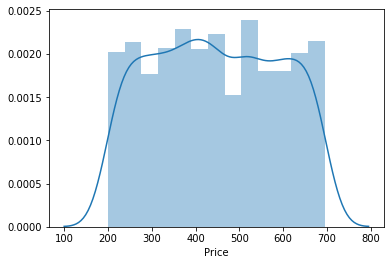

In [14]:
sns.distplot(df.Price)

### Noise,duplicates removal, filling missing values

In [15]:
missing_values = df.isnull().sum().sort_values(ascending=False)
perc_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([missing_values,perc_missing],axis=1,keys=['Total','Percent'])

missing_data

,Total,Percent
catagory,1591,0.815479
Disease,1229,0.629933
Diet,841,0.431061
Nutrient,777,0.398257
sub_catagory,770,0.394669
description,136,0.069708
Price,0,0.000000
Review,0,0.000000
Veg_Non,0,0.000000
Name,0,0.000000


Processing column Nutrient

In [16]:
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='meat' and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='rice' and df.loc[i,'Nutrient'] == 'none': 
        df.loc[i,'Nutrient'] = 'Carbohydrates'
        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='chicken'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='seafood'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Vitamin_A'

for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='bread'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='vegetarian'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Calcium'        

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='navratri'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Fibre'      
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='diwali'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrate' 

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='holi'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrate'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='breakfast'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Iron'  
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='healthy'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Fibre'     
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='kids'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Calcium'    
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='eid'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='christmas'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrates'       

for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='dinner'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrates'   
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='desserts'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Sugar' 

        
for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='snacks'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'

for i in range(df.shape[0]):
    if df.loc[i,'catagory']=='easter'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Protien'
        
for i in range(df.shape[0]):
    if df.loc[i,'sub_catagory']=='durga puja'and df.loc[i,'Nutrient'] == 'none':
        df.loc[i,'Nutrient'] = 'Carbohydrates'

print(df[df['Nutrient']=='none'].shape)


(0, 10)


Processing column catagory


In [17]:
l = ['Cookie','Cookies','cookie','cookies']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'cookie'
df[df['catagory']=='cookie']
df[df['catagory']=='cookie'].shape

l = ['Paneer','paneer']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'paneer'
df[df['catagory']=='paneer'].shape

l = ['Salad','salad']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'salad'
df[df['catagory']=='salad'].shape

l = ['Thandai','thandai']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'thandai'
df[df['catagory']=='thandai'].shape

l = ['milk','Milk']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'milk'
df[df['catagory']=='milk'].shape

l = ['soup','Soup']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'soup'
df[df['catagory']=='soup'].shape

l = ['margarita','Margarita']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'margarita'
df[df['catagory']=='margarita'].shape

l = ['Tea','tea','chai','Chai']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'tea'
df[df['catagory']=='tea'].shape

l = ['ESPRESSO','CAPPUCCINO','CAFÉ LATTE','MACCHIATO','AMERICANO','DECAFFEINATED','Coffee','CAFÉ LATTE']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'coffee'
df[df['catagory']=='coffee'].shape

l = ['Wine','wine']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'wine'
df[df['catagory']=='wine'].shape

l = ['Cake','cake']

for i in range(df.shape[0]):
    
    s = df.loc[i,'Name'].split()
    for j in s:
        if j in l:
            df.loc[i,'catagory'] = 'cake'
df[df['catagory']=='cake'].shape

from collections import Counter
l = []
for i in range(df.shape[0]):
    s = df.loc[i,'Name'].split()
    for j in s:
        l.append(j.lower())
    
d = Counter(l)


l = ['chicken', 'almond', 'chocolate', 'kheer', 'cake', 'curry', 'rice', 'biryani', 'halwa', 'fish', 'aloo', 'mutton',
    
     'cookies', 'baked', 'kebab', 'christmas', 'ladoo', 'badam', 'strawberry', 'apple', 'salad', 'tikka', 'lamb',
     
     'soup', 'banana', 'vada', 'bread', 'sauce', 'kaju', 'paneer', 'prawn', 'barfi', 'mango', 'thandai', 'coconut',
     
     'dahi', 'pizza', 'modak', 'rasmalai', 'dal', 'malai', 'gosht', 'kofta', 'gujiya', 'pasta', 
     
     'pulao', 'methi',  'poha', 'butter', 'dosa', 'carrot', 'chaat','kebabs', 'kulfi', 'gajar',
     
     'korma', 'pista', 'gulab', 'khichdi', 'palak', 'roti', 'roast', 'tikki','cheese', 'matar', 'smoothie',
     
     'cranberry', 'sabudana', 'rabdi', 'berry', 'coffee','paratha', 'walnut', 'spicy', 'potato', 'beetroot',
     
      'anjeer', 'samosa', 'kachori', 'gulkand', 'risotto', 'margarita','honey', 'corn', 'nuts', 'roasted', 
     
      'spinach', 'sev','cardamom', 'dome', 'sangria','chawal', 'arbi', 'mushroom', 'tea', 'egg', 'pie',
     
      'parantha', 'kulcha', 'khaja', 'rabri', 'jalebi', 'bhaji','chilli', 'tricolour', 'chikki', 'zucchini',
     
     'gluten-free', 'barley', 'raspberry', 'chakli', 'dip', 'shankarpali', 'dessert', 'cashew', 'tomato', 'soya',
     
     'stuffed', 'chana', 'steam', 'bao', 'peda', 'tiranga', 'pav', 'idli', 'seed', 'saffron', 'love', 'chutney',
     
     'cocktail', 'mint', 'garlic', 'turkey', 'microwave', 'wrapped', 'keema', 'shami',
     
     'ghevar', 'pancakes', 'pudding', 'papad',]


for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        s = df.loc[i,'Name'].split()
        for j in s:
            if j.lower() in l:
                df.loc[i,'catagory'] = j.lower()
 
l = []
for i in range(df.shape[0]):
    s = df.loc[i,'Name'].split()
    for j in s:
        l.append(j.lower())
    
d = Counter(l)
sorted(d.items(),key = lambda x:x[1],reverse=True)
l = [i[0] for i in sorted(d.items(),key = lambda x:x[1],reverse=True) if i[1]<5 and i[1]>2]

l = ['broccoli',  'shorba', 'gluten', 'scotch', 'lentil', 'kahwa', 'kiwi', 'oats', 'wings', 'momos',
     
     'gajak','salmon', 'appam', 'basil', 'pithe', 'warm', 'kinnu', 'punch', 'spanish', 'milk', 'fresh', 'cappuccino',
     
      'plum','tawa', 'kadai', 'kofte', 'malabari', 'coriander','pistachio', 'kalakand', '(vrat)', 'upma', 'dundee',
     
     'gehun', 'sushi', 'khoya','panacotta', 'eggless', 'easter', 'kashmiri', 'khus', 'besan', 'sohan', 'panjiri',
     
     'malpua', 'payesh', 'imarti', 'atte', 'petha', 'omelette','laddu', 'chhena', 'almonds', 'chargrilled', 'bell',
     
     'glazed', 'watermelon', 'polenta', 'recipe', 'som', 'tam', 'tangy', 'amaranth', 'moong', 'missi', 
     
     'quesadilla', 'dragon', 'fire', 'argentino', 'belgian', 'chop', 'moonglet', 'lasooni', 
     
      'pakori', 'zaitooni', 'croquettes','gujiyas', 'hariyali', 'apricot', 'gokul', 'shower', 'devils', 'onion',
     
     'gur', 'maple', 'ice', 'desi', 'gobhi', 'mastani', 'drink', 'hot', 'mocha', 'whisky', 'bourbon', 'irish',
     
     'boondi','amritsari', 'cauliflower', 'rum', 'fritters', 'seared', 'crab', 'cajun', 'bacon', 'mongolian', 
     
     
     
     'rava', 'pineapple', 'bruschetta', 'breton', 'luchi',
     
     'parotta', 'poppy', 'brownie', 'macaroons', 'crunch','turkish','vanilla', 'cinnamon', 'cookie', 'indian',
     
     'bedmi', 'raseele', 'suji', 'zaffrani', 'nariyal', 'aanarsa', 'assorted', 'yogurt', 'creamy', 'sheer',
     
     'pakode', 'kele', 'thepla', 'bonda', 'singhare', 'jalapeno', 'makki', 'chole', 'daal', 'pani', 'keerai',
     
     'vadi', 'basundi', 'dhokli', 'dhokla', 'pohe', 'papdi', 'ras']

for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        s = df.loc[i,'Name'].split()
        for j in s:
            if j.lower() in l:
                df.loc[i,'catagory'] = j.lower()
                
print('Catagory column with null values',df[df['catagory'].isnull()].shape)

l = ['chicken', 'almond', 'chocolate', 'kheer', 'cake', 'curry', 'rice', 'biryani', 'halwa', 'fish', 'aloo', 'mutton',
    
     'cookies', 'baked', 'kebab', 'christmas', 'ladoo', 'badam', 'strawberry', 'apple', 'salad', 'tikka', 'lamb',
     
     'soup', 'banana', 'vada', 'bread', 'sauce', 'kaju', 'paneer', 'prawn', 'barfi', 'mango', 'thandai', 'coconut',
     
     'dahi', 'pizza', 'modak', 'rasmalai', 'dal', 'malai', 'gosht', 'kofta', 'gujiya', 'pasta', 
     
     'pulao', 'methi',  'poha', 'butter', 'dosa', 'carrot', 'chaat','kebabs', 'kulfi', 'gajar',
     
     'korma', 'pista', 'gulab', 'khichdi', 'palak', 'roti', 'roast', 'tikki','cheese', 'matar', 'smoothie',
     
     'cranberry', 'sabudana', 'rabdi', 'berry', 'coffee','paratha', 'walnut', 'spicy', 'potato', 'beetroot',
     
      'anjeer', 'samosa', 'kachori', 'gulkand', 'risotto', 'margarita','honey', 'corn', 'nuts', 'roasted', 
     
      'spinach', 'sev','cardamom', 'dome', 'sangria','chawal', 'arbi', 'mushroom', 'tea', 'egg', 'pie',
     
      'parantha', 'kulcha', 'khaja', 'rabri', 'jalebi', 'bhaji','chilli', 'tricolour', 'chikki', 'zucchini',
     
     'gluten-free', 'barley', 'raspberry', 'chakli', 'dip', 'shankarpali', 'dessert', 'cashew', 'tomato', 'soya',
     
     'stuffed', 'chana', 'steam', 'bao', 'peda', 'tiranga', 'pav', 'idli', 'seed', 'saffron', 'love', 'chutney',
     
     'cocktail', 'mint', 'garlic', 'turkey', 'microwave', 'wrapped', 'keema', 'shami',
     
     'ghevar', 'pancakes', 'pudding', 'papad',]

for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        if len(str(df.loc[i,'description']))>2:
            s = str(df.loc[i,'description']).split()
            for j in s:
                if j.lower() in l:
                    df.loc[i,'catagory'] = j.lower()
                    
l = ['broccoli',  'shorba', 'gluten', 'scotch', 'lentil', 'kahwa', 'kiwi', 'oats', 'wings', 'momos',
     
     'gajak','salmon', 'appam', 'basil', 'pithe', 'warm', 'kinnu', 'punch', 'spanish', 'milk', 'fresh', 'cappuccino',
     
      'plum','tawa', 'kadai', 'kofte', 'malabari', 'coriander','pistachio', 'kalakand', '(vrat)', 'upma', 'dundee',
     
     'gehun', 'sushi', 'khoya','panacotta', 'eggless', 'easter', 'kashmiri', 'khus', 'besan', 'sohan', 'panjiri',
     
     'malpua', 'payesh', 'imarti', 'atte', 'petha', 'omelette','laddu', 'chhena', 'almonds', 'chargrilled', 'bell',
     
     'glazed', 'watermelon', 'polenta', 'recipe', 'som', 'tam', 'tangy', 'amaranth', 'moong', 'missi', 
     
     'quesadilla', 'dragon', 'fire', 'argentino', 'belgian', 'chop', 'moonglet', 'lasooni', 
     
      'pakori', 'zaitooni', 'croquettes','gujiyas', 'hariyali', 'apricot', 'gokul', 'shower', 'devils', 'onion',
     
     'gur', 'maple', 'ice', 'desi', 'gobhi', 'mastani', 'drink', 'hot', 'mocha', 'whisky', 'bourbon', 'irish',
     
     'boondi','amritsari', 'cauliflower', 'rum', 'fritters', 'seared', 'crab', 'cajun', 'bacon', 'mongolian', 
     
     
     
     'rava', 'pineapple', 'bruschetta', 'breton', 'luchi',
     
     'parotta', 'poppy', 'brownie', 'macaroons', 'crunch','turkish','vanilla', 'cinnamon', 'cookie', 'indian',
     
     'bedmi', 'raseele', 'suji', 'zaffrani', 'nariyal', 'aanarsa', 'assorted', 'yogurt', 'creamy', 'sheer',
     
     'pakode', 'kele', 'thepla', 'bonda', 'singhare', 'jalapeno', 'makki', 'chole', 'daal', 'pani', 'keerai',
     
     'vadi', 'basundi', 'dhokli', 'dhokla', 'pohe', 'papdi', 'ras']
for i in range(df.shape[0]):
    
    if str(df.loc[i,'catagory']) == 'nan':
        if len(str(df.loc[i,'description']))>2:
            s = str(df.loc[i,'description']).split()
            for j in s:
                if j.lower() in l:
                    df.loc[i,'catagory'] = j.lower()

Catagory column with null values (469, 10)


In [18]:
col = list(df.columns)
missing_values = []
for i in col:
    missing_values.append(df[i].isnull().sum())
    
missing_df = pd.DataFrame({'Columns':col,'Total_missing':missing_values})
print(df.shape)
missing_df

(1951, 10)


,Columns,Total_missing
0,Name,0
1,catagory,200
2,description,136
3,sub_catagory,770
4,Veg_Non,0
5,Review,0
6,Nutrient,777
7,Disease,1229
8,Diet,841
9,Price,0


### Clearly we have a fine dataset to works with


In [19]:
df.head(10)

,Name,catagory,description,sub_catagory,Veg_Non,Review,Nutrient,Disease,Diet,Price
0,Summer Squash Salad,salad,"Key Ingredients: white balsamic vinegar, lemon...",healthy,veg,5,Fiber,obesity diabeties goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,495
1,Chicken Minced Salad,salad,"Key Ingredients: olive oil, chicken mince, gar...",healthy,non-veg,10,Fiber,kidney_disease obesity hypertension anemia go...,type_a_diet high_protien_diet high_fiber_diet...,435
2,Sweet Chilli Almonds,chilli,"Key Ingredients: almonds whole, egg white, cur...",healthy,veg,1,Vitamin_A,kidney_disease hypertension goitre heart_dise...,high_protien_diet high_fiber_diet paleo_diet ...,390
3,Tricolour Salad,salad,"Key Ingredients: vinegar, honey/sugar, soy sau...",healthy,veg,6,Fiber,obesity goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,580
4,Sakkarai Pongal,coconut,"Key Ingredients: rice, yellow moong dal, milk,...",healthy,veg,3,NaN,NaN,NaN,475
5,Gulab Badam Chikki,chikki,"Key Ingredients: butter, sugar, salt, almonds,...",healthy,veg,6,NaN,NaN,NaN,235
6,Zucchini Halwa,halwa,"Key Ingredients: zucchini, full fat milk, ghee...",healthy,veg,2,NaN,diabeties goitre,ketogenic_diet,295
7,Gluten-Free Christmas Cake,cake,Key Ingredients: Christmas dry fruits (pre-soa...,healthy,veg,3,Vitamin_A,goitre kidney_disease,high_protien_diet,585
8,Japanese Curry Arancini With Barley Salsa,barley,"Key Ingredients: japanese curry, sticky rice, ...",healthy,veg,1,Calcium,goitre,high_protien_diet high_fiber_diet ketogenic_d...,420
9,Chocolate Nero Cookies,cookie,"Key Ingredients: almonds, eggs, granulated sug...",healthy,veg,5,Magnesium,hypertension heart_disease,high_fiber_diet ketogenic_diet high_protien_diet,560


### Removing all null values

In [20]:
df = df[df['description'].notna()]
df = df[df['Nutrient'].notna()]
df = df[df['description'].notna()]
df = df[df['catagory'].notna()]
df = df[df['Disease'].notna()]
df = df[df['Diet'].notna()]
df = df.reset_index(drop=True)

description = []
for i in df.description:
    description.append(i[16:])
df['description'] = description

name = []
for i in df.Name:
    name.append(str.lower(i.strip()))
df['Name'] = name
n = []
for i in df.Nutrient:
    n.append(str.lower(i.strip()))
df['Nutrient'] = n

n = []
for i in df.description:
    n.append(str.lower(i.strip()))
df['description'] = n

df = df.drop('sub_catagory',axis=1)

### Adding a Columns User

In [21]:

l = []
for i in range(1,101):
    l.append(i)
user = []
for i in range(df.shape[0]):
    user.append(random.choice(l))

df['User_Id'] = user


### Adding a column Meal_id

In [22]:
meal_name = list(df.Name.unique())
len(meal_name)
d = {}
for i in range(0,309):
    d[meal_name[i]] = f'meal_id{i+1}'
l = []
for i in range(df.shape[0]):
    l.append(d[df.loc[i,'Name']])
    
df['Meal_Id'] = l


### Finally we have

In [23]:
df.head()

,Name,catagory,description,Veg_Non,Review,Nutrient,Disease,Diet,Price,User_Id,Meal_Id
0,summer squash salad,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,5,fiber,obesity diabeties goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,495,49,meal_id1
1,chicken minced salad,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,10,fiber,kidney_disease obesity hypertension anemia go...,type_a_diet high_protien_diet high_fiber_diet...,435,39,meal_id2
2,sweet chilli almonds,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,1,vitamin_a,kidney_disease hypertension goitre heart_dise...,high_protien_diet high_fiber_diet paleo_diet ...,390,77,meal_id3
3,tricolour salad,salad,"vinegar, honey/sugar, soy sauce, salt, garlic ...",veg,6,fiber,obesity goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,580,90,meal_id4
4,gluten-free christmas cake,cake,"christmas dry fruits (pre-soaked), orange zest...",veg,3,vitamin_a,goitre kidney_disease,high_protien_diet,585,88,meal_id5


In [24]:
df.isnull().sum()

Name           0
catagory       0
description    0
Veg_Non        0
Review         0
Nutrient       0
Disease        0
Diet           0
Price          0
User_Id        0
Meal_Id        0
dtype: int64

In [25]:

df_activity = df[['User_Id','Meal_Id','Name','catagory','description','Veg_Non','Review','Nutrient','Disease','Diet','Price']]


### demo dataset for user activity (meals eaten by user / purchased)

In [26]:
user = []
for i in range(df_activity.shape[0]):
    k = df_activity.loc[i,'User_Id']
    user.append(f'User_{k}')
df_activity['User_Id'] = user
df_activity.to_csv('user_activity.csv',index=False)
df_activity.head(3)

,User_Id,Meal_Id,Name,catagory,description,Veg_Non,Review,Nutrient,Disease,Diet,Price
0,User_49,meal_id1,summer squash salad,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,5,fiber,obesity diabeties goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,495
1,User_39,meal_id2,chicken minced salad,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,10,fiber,kidney_disease obesity hypertension anemia go...,type_a_diet high_protien_diet high_fiber_diet...,435
2,User_77,meal_id3,sweet chilli almonds,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,1,vitamin_a,kidney_disease hypertension goitre heart_dise...,high_protien_diet high_fiber_diet paleo_diet ...,390


In [27]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 11 columns):
User_Id        512 non-null object
Meal_Id        512 non-null object
Name           512 non-null object
catagory       512 non-null object
description    512 non-null object
Veg_Non        512 non-null object
Review         512 non-null int64
Nutrient       512 non-null object
Disease        512 non-null object
Diet           512 non-null object
Price          512 non-null int64
dtypes: int64(2), object(9)
memory usage: 44.1+ KB


### demo dataset for 100 user profiles

In [28]:
df_profiles = df[['User_Id','Veg_Non','Nutrient','Disease','Diet']]

df_profiles = df_profiles.drop_duplicates('User_Id').sort_values('User_Id').reset_index(drop=True)

user = []
for i in range(df_profiles.shape[0]):
    k = df_profiles.loc[i,'User_Id']
    user.append(f'User_{k}')
df_profiles['User_Id'] = user
df_profiles.to_csv('user_Profiles.csv',index=False)
df_profiles.head(3)

,User_Id,Veg_Non,Nutrient,Disease,Diet
0,User_1,non-veg,chloride,anemia kidney_disease goitre rickets pregnancy,type_a_diet high_protien_diet low_carb_diet l...
1,User_2,veg,chloride,goitre,high_fiber_diet vegan_diet
2,User_3,veg,magnesium,cancer hypertension goitre heart_disease scurvy,high_fiber_diet ketogenic_diet high_protien_diet


In [29]:
df_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
User_Id     98 non-null object
Veg_Non     98 non-null object
Nutrient    98 non-null object
Disease     98 non-null object
Diet        98 non-null object
dtypes: object(5)
memory usage: 3.9+ KB


### demo data for user Recent activity (min 30 days)

In [30]:
user = []
for i in range(df.shape[0]):
    k = df.loc[i,'User_Id']
    user.append(f'User_{k}')
df['User_Id'] = user


In [31]:
df_recent = df[['Meal_Id']]
df_recent
Rated = []
liked = []
searched = []
for i in range(df.shape[0]):
    Rated.append(random.randint(0,1)) # if rated > 5
    liked.append(random.randint(0,1))
    searched.append(random.randint(0,1))
df_recent['Rated'] =  Rated
df_recent['Liked'] = liked
df_recent['Searched'] = searched
df_recent = df_recent[((df_recent.Rated+df_recent.Liked+df_recent.Searched)>=1) & ((df_recent.Rated+df_recent.Liked+df_recent.Searched)<2)]
df_recent =df_recent.head(30).reset_index(drop=True)
dt = datetime.datetime(2020, 3, 1)
end = datetime.datetime(2020, 3, 30)
step = datetime.timedelta(hours=2,seconds=34)

result = []

while dt < end:
    result.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step
    
    

date = []
for i in range(30):
    date.append(random.choice(result))
    
date = sorted(date)
df_recent['Timestamp'] = date
df_recent.to_csv('recent_activity.csv',index=False)
df_recent.head(3)

,Meal_Id,Rated,Liked,Searched,Timestamp
0,meal_id1,1,0,0,2020-03-01 22:06:14
1,meal_id2,1,0,0,2020-03-02 06:08:30
2,meal_id4,1,0,0,2020-03-02 14:10:46


In [32]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
Meal_Id      30 non-null object
Rated        30 non-null int64
Liked        30 non-null int64
Searched     30 non-null int64
Timestamp    30 non-null object
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


### Dataset to recommend with

In [33]:
df = df[['Meal_Id','Review','Name','catagory','description','Veg_Non','Nutrient','Disease','Diet','Price']]
df.to_csv('dataset.csv',index=False)
df.head(3)

,Meal_Id,Review,Name,catagory,description,Veg_Non,Nutrient,Disease,Diet,Price
0,meal_id1,5,summer squash salad,salad,"white balsamic vinegar, lemon juice, lemon rin...",veg,fiber,obesity diabeties goitre hypertension,high_protien_diet high_fiber_diet ketogenic_d...,495
1,meal_id2,10,chicken minced salad,salad,"olive oil, chicken mince, garlic (minced), oni...",non-veg,fiber,kidney_disease obesity hypertension anemia go...,type_a_diet high_protien_diet high_fiber_diet...,435
2,meal_id3,1,sweet chilli almonds,chilli,"almonds whole, egg white, curry leaves, salt, ...",veg,vitamin_a,kidney_disease hypertension goitre heart_dise...,high_protien_diet high_fiber_diet paleo_diet ...,390


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 10 columns):
Meal_Id        512 non-null object
Review         512 non-null int64
Name           512 non-null object
catagory       512 non-null object
description    512 non-null object
Veg_Non        512 non-null object
Nutrient       512 non-null object
Disease        512 non-null object
Diet           512 non-null object
Price          512 non-null int64
dtypes: int64(2), object(8)
memory usage: 40.1+ KB
